In [1]:
from sage.all import *
def metricna_dimenzija_usmerjenega_grafa(graf):
    
    if not isinstance(graf, DiGraph):
        return "Napaka: Podani graf ni usmerjen graf."
    
    # vozlišča grafa
    V = graf.vertices()
    
    # Izračun razdalj med vsemi pari vozlišč
    razdalje = {u: {v: graf.distance(u, v) for v in V} for u in V}
    
    # linearni program
    lp = MixedIntegerLinearProgram(maximization=False)
    x = lp.new_variable(binary=True)  # Ustvarjanje binarnih spremenljivk za vsako vozlišče
    
    # Cilj: minimizirati vsoto vseh x[v]
    lp.set_objective(sum(x[v] for v in V))
    
    # Preverjanje, ali graf izpolnjuje pogoje
    for u in V:
        for v in V:
            if u != v:
                vozlisca = [
                    w for w in V
                    if razdalje[w][u] != razdalje[w][v] and
                    razdalje[w][u] < infinity and
                    razdalje[w][v] < infinity
                ]
                
                # Če za par u, v ne obstaja ustrezno w, ne moremo izračunati metrične dimenzije
                if not vozlisca:
                    return f"Metrične dimenzije ni mogoče določiti: za par vozlišč ({u}, {v}) ne obstaja ustrezno vozlišče."
                
                # Dodamo omejitev, če obstajajo ustrezna vozlišča w
                lp.add_constraint(sum(x[w] for w in vozlisca) >= 1)
    
    # Rešitev linearnega programa
    lp.solve()
    
    # Pridobimo rezultate
    razresljiva_mnozica = [v for v in V if lp.get_values(x[v]) == 1]
    return razresljiva_mnozica, len(razresljiva_mnozica)



**NEKAJ PRIMEROV UPORABE CLP ZA IZRAČUN METRIČNIH DIMENZIJ**   
**USMERJENIH GRAFOV:**


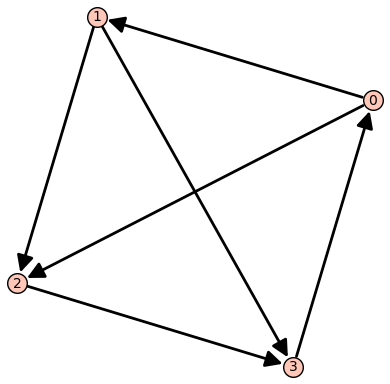

([2], 1)

In [2]:
G = DiGraph({0: [1, 2], 1: [2, 3], 2: [3], 3: [0]})
G.show()
metricna_dimenzija_usmerjenega_grafa(G)


In [3]:
H = Graph([(0, 1), (0, 'a'), (2, 'b')])
H.plot()
metricna_dimenzija_usmerjenega_grafa(H)

'Napaka: Podani graf ni usmerjen graf.'

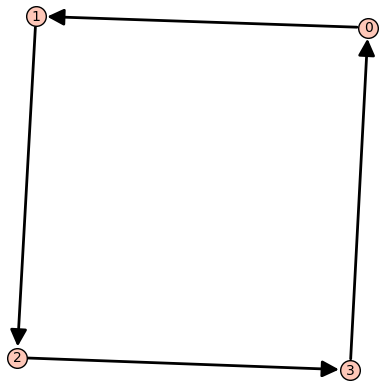

Test 1:
([0], 1)


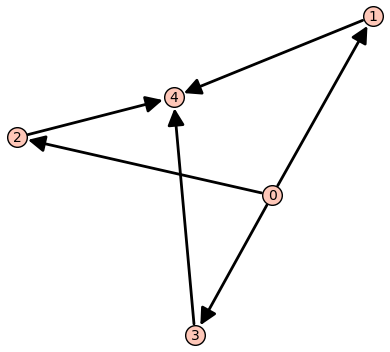

Test 2:
Metrične dimenzije ni mogoče določiti: za par vozlišč (1, 2) ne obstaja ustrezno vozlišče.


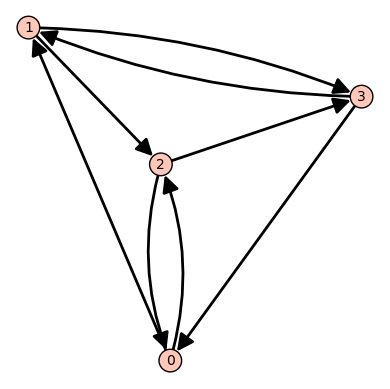

Test 3:
([0, 1], 2)


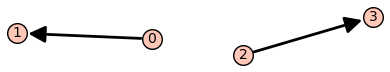

Test 4:
Metrične dimenzije ni mogoče določiti: za par vozlišč (0, 2) ne obstaja ustrezno vozlišče.


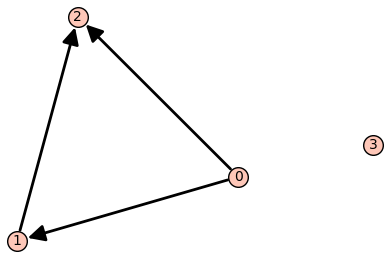

Test 5:
Metrične dimenzije ni mogoče določiti: za par vozlišč (0, 3) ne obstaja ustrezno vozlišče.


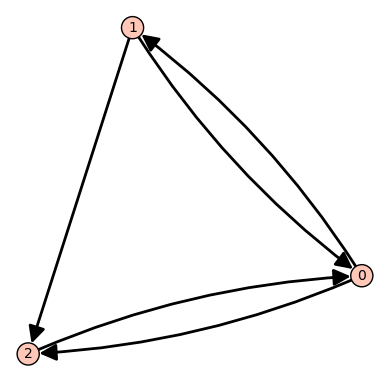

Test 6:
([2], 1)


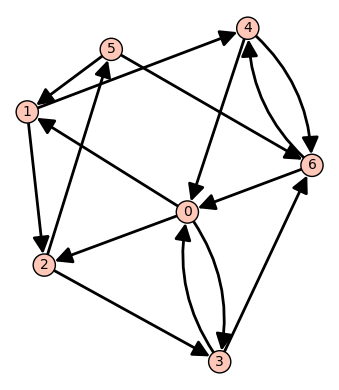

Test 7:
([0, 2], 2)


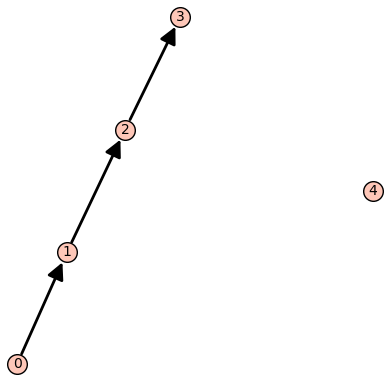

Test 8:
Metrične dimenzije ni mogoče določiti: za par vozlišč (0, 4) ne obstaja ustrezno vozlišče.


In [4]:
grafi = [
    DiGraph({0: [1], 1: [2], 2: [3], 3: [0]}),  # G1
    DiGraph({0: [1, 2, 3], 1: [4], 2: [4], 3: [4], 4: []}),  # G2
    DiGraph({0: [1, 2], 1: [2, 3], 2: [3, 0], 3: [0, 1]}),  # G3
    DiGraph({0: [1], 2: [3]}),  # G4
    DiGraph({0: [1, 2], 1: [2], 2: [], 3: []}),  # G5
    DiGraph({0: [1, 2], 1: [2, 0], 2: [0]}),  # G6
    DiGraph({
        0: [1, 2, 3],
        1: [2, 4],
        2: [3, 5],
        3: [0, 6],
        4: [0, 6],
        5: [1, 6],
        6: [0, 4]
    }),  # G7
    DiGraph({0: [1], 1: [2], 2: [3], 3: [], 4: []})  # G8
]

for i, G in enumerate(grafi, start=1):
    G.show()
    print(f"Test {i}:")
    rezultat = metricna_dimenzija_usmerjenega_grafa(G)
    print(rezultat)


Graf T:


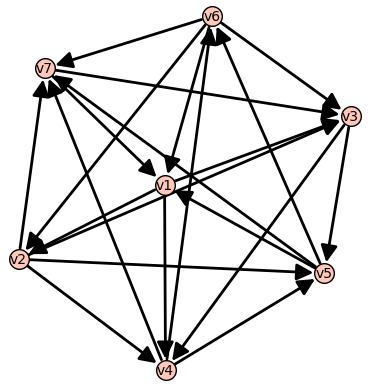

(['v1', 'v3', 'v7'], 3)

In [5]:
T = DiGraph()

vozlisca = ["v1", "v2", "v3", "v4", "v5", "v6", "v7"]
T.add_vertices(vozlisca)

povezave = [

    ("v1", "v2"), ("v1", "v3"), ("v1", "v4"),
    ("v2", "v3"), ("v2", "v4"), ("v2", "v5"), ("v2", "v7"),
    ("v3", "v4"), ("v3", "v5"),
    ("v4", "v7"), ("v4", "v5"), ("v4", "v6"),
    ("v5", "v6"), ("v5", "v7"), ("v5", "v1"),
    ("v6", "v7"), ("v6", "v1"), ("v6", "v2"), ("v6", "v3"),
    ("v7", "v1"), ("v7", "v3")
]

T.add_edges(povezave)

print("Graf T:")
T.show()
metricna_dimenzija_usmerjenega_grafa(T)


**UPORABA  CLP NA CIRKULANTNIH GRAFH:**  



In [3]:
def clockwise_circulant_graph(n, d):
    odmiki = list(range(1, d + 1)) 
    G = digraphs.Circulant(n, odmiki)
    plot = G.plot(layout="circular", vertex_size=300, vertex_color="skyblue", edge_color="black", 
                  vertex_labels=True)
    plot.show()
    return G



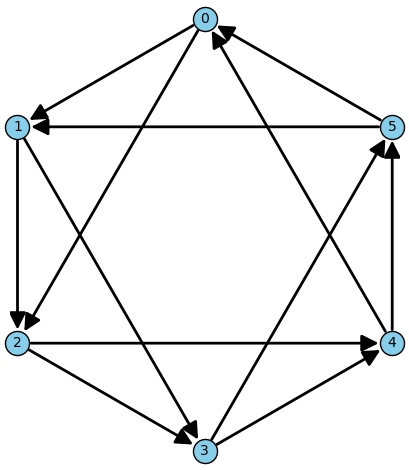

([0, 5], 2)

In [4]:
C6_2 = clockwise_circulant_graph(6, 2)  
metricna_dimenzija_usmerjenega_grafa(C6_2)

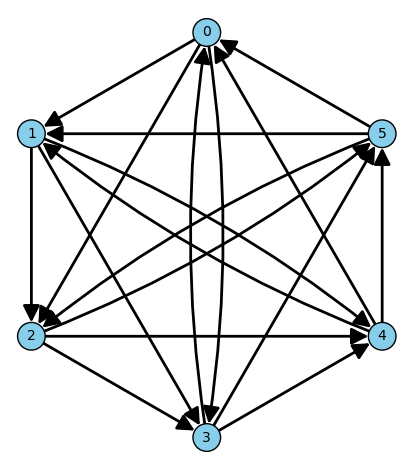

([0, 1, 3], 3)

In [5]:
C6_3 = clockwise_circulant_graph(6, 3) 
metricna_dimenzija_usmerjenega_grafa(C6_3)

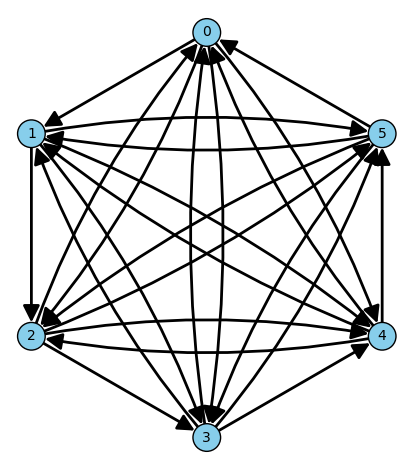

([0, 1, 3], 3)

In [6]:
C6_4 = clockwise_circulant_graph(6, 4)  
metricna_dimenzija_usmerjenega_grafa(C6_4)

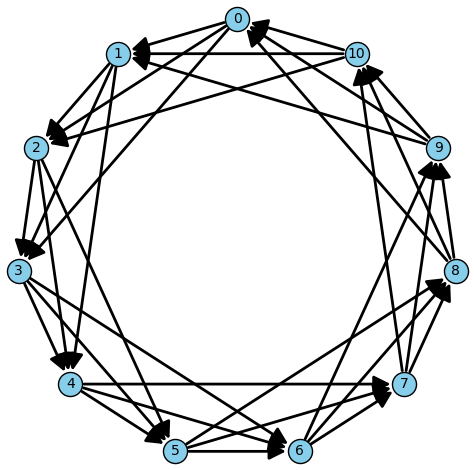

([0, 2, 9], 3)

In [7]:
C11_3 = clockwise_circulant_graph(11, 3)  
metricna_dimenzija_usmerjenega_grafa(C11_3)

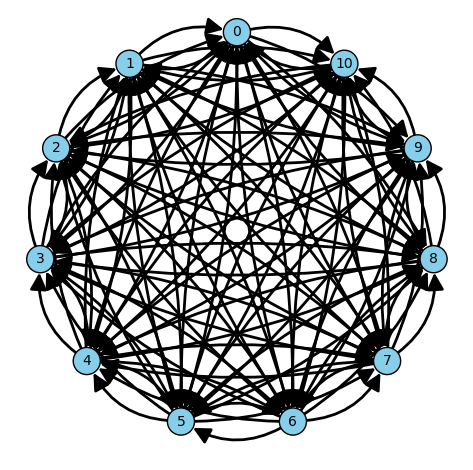

([0, 1, 3, 4, 5, 6, 7, 8, 9, 10], 10)

In [8]:
C11_10 = clockwise_circulant_graph(11, 10)  
metricna_dimenzija_usmerjenega_grafa(C11_10)

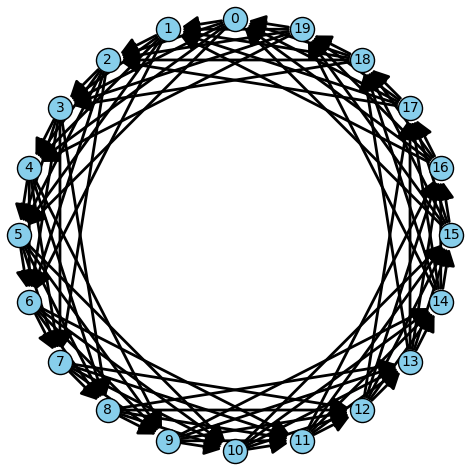

([0, 3, 9, 12, 16], 5)

In [9]:
C20_5 = clockwise_circulant_graph(20, 5)  
metricna_dimenzija_usmerjenega_grafa(C20_5)

In [2]:
#ponovno sem definirala to funkcijo da ko poženem file, se od tukaj naprej posamični grafi ne bodo več risali
def clockwise_circulant_graph(n, d):
    odmiki = list(range(1, d + 1)) 
    return digraphs.Circulant(n, odmiki)
    

**IZRAČUN METRIČNIH DIMENZIJ CIRKULANTNIH GRAFOV** \(za n ≤ 40 in vse možne d\):  



In [3]:
def generiraj_podatke_za_circulant_graphs_od_do(min_n, max_n):
    podatki = []  
    for n in range(min_n, max_n + 1):  
        for d in range(1, n):  
            G = clockwise_circulant_graph(n, d) 
            _, dimenzija = metricna_dimenzija_usmerjenega_grafa(G)  
            podatki.append((n, d, dimenzija))  
    return podatki

    

In [6]:
podatki = generiraj_podatke_za_circulant_graphs_od_do(3,30)

In [4]:
import csv
#definiram funkcijo za shranjevanje podatkov v csv
def shrani_v_csv(podatki, ime_datoteke):
    with open(ime_datoteke, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["n", "d", "dimenzija"])  
        writer.writerows(podatki)
    print(f"Podatki shranjeni v datoteko {ime_datoteke}.")


In [11]:
shrani_v_csv(podatki, "cirkulantni_grafi.csv")

Podatki shranjeni v datoteko cirkulantni_grafi.csv.


In [7]:
podatki2 = generiraj_podatke_za_circulant_graphs_od_do(31,35)         #ker program počasi sem izvajala po delih

In [5]:
#tukaj še definiram funkcijo s katero vse kasneje izračunane podatke samo dodam v isti csv dokument
def dodaj_v_csv(novi_podatki, ime_datoteke):
    with open(ime_datoteke, mode='a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerows(novi_podatki)
    print(f"Dodani podatki v datoteko {ime_datoteke}.")

In [0]:
dodaj_v_csv(podatki2, "cirkulantni_grafi.csv")

In [10]:
podatki3 = generiraj_podatke_za_circulant_graphs_od_do(36,40)

In [0]:
dodaj_v_csv(podatki3, "cirkulantni_grafi.csv")

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def graf_metricnih_dimenzij(csv):
    dimenzije = pd.read_csv(csv)
    
    tabela = dimenzije.pivot(index='d', columns='n', values='dimenzija')

    # Risanje grafa
    plt.figure(figsize=(10, 8))
    sns.heatmap(tabela, annot=True, fmt=".0f", cmap="viridis", cbar_kws={'label': 'Metrična dimenzija'})
    plt.xlabel("n (število vozlišč)")
    plt.ylabel("d")
    plt.title("Metrične dimenzije usmerjenih cirkulantnih grafov")
    plt.show()


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/scikits/__init__.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__("pkg_resources").declare_namespace(__name__)


/ext/sage/10.4/local/var/lib/sage/venv-python3.12.4/lib/python3.12/site-packages/scikits/__init__.py:1: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('scikits')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  __import__("pkg_resources").declare_namespace(__name__)


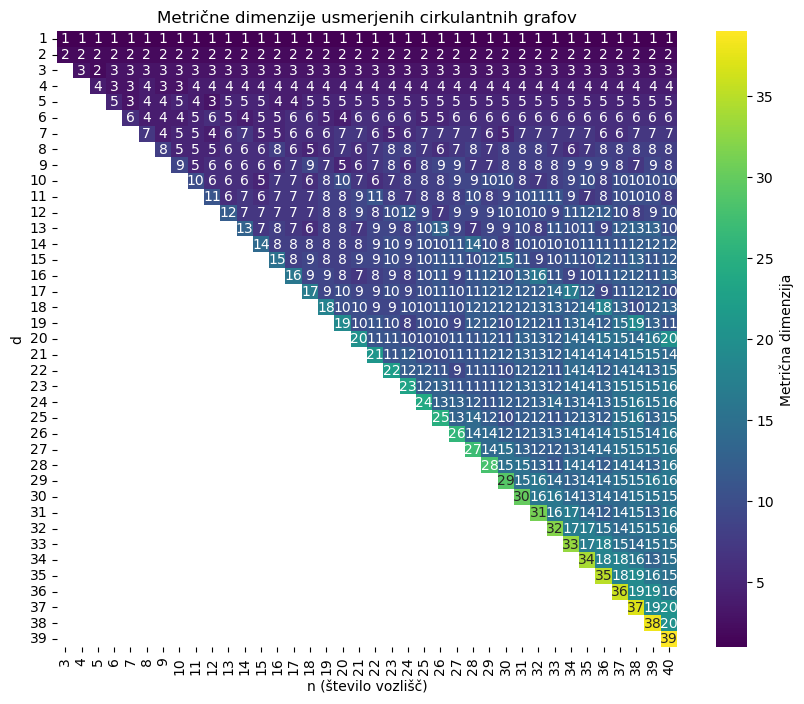

In [9]:
graf_metricnih_dimenzij("cirkulantni_grafi.csv")

In [7]:
def graf_metricnih_dimenzij_cd(csv): #metrične dimenzije za tiste n, kjer je n = cd za neko konstanto c

    dimenzije = pd.read_csv(csv)
    
    # Filtriram vrstice, kjer je n deljivo z d
    dimenzije = dimenzije[dimenzije['n'] % dimenzije['d'] == 0]
    
  
    tabela = dimenzije.pivot(index='d', columns='n', values='dimenzija')

    # Risanje grafa
    plt.figure(figsize=(10, 8))
    sns.heatmap(tabela, annot=True, fmt=".0f", cmap="viridis", cbar_kws={'label': 'Metrična dimenzija'})
    plt.xlabel("n (število vozlišč)")
    plt.ylabel("d")
    plt.title("Metrične dimenzije usmerjenih cirkulantnih grafov za n = cd")
    plt.show()

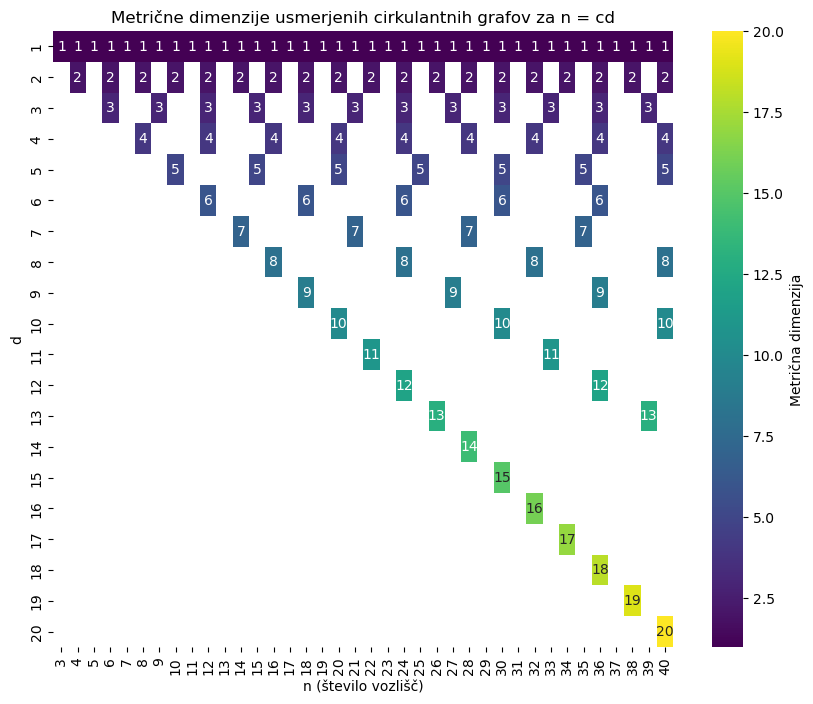

In [6]:
graf_metricnih_dimenzij_cd("cirkulantni_grafi.csv")